In [1]:
# Import pandas
import pandas as pd

# Specify the path to your text file
file_path = 'C:\\Users\\User\\SDA490\\Text4'

# Read the text file and create a DataFrame
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()
    # Strip newline characters from each line
    lines = [line.strip() for line in lines if line.strip()]

# Create a DataFrame with a single column "text"
df = pd.DataFrame(lines, columns=['text'])

# Display the first few entries to verify
print(df.head())

                                                text
0  We came to Canada exactly 3 years ago as perma...
1  a very tough express entry program. I got ever...
2  score, a Software Engineering master's & bache...
3  software engineering job experience under my b...
4  cracked 4 interviews out of 5 interviews and s...


In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each post
df['sentiment_scores'] = df['text'].apply(lambda x: sia.polarity_scores(x))
df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Determine the overall sentiment based on the compound score
df['overall_sentiment'] = df['compound'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Example output
print(df[['text', 'overall_sentiment']].head())

                                                text overall_sentiment
0  We came to Canada exactly 3 years ago as perma...           neutral
1  a very tough express entry program. I got ever...          negative
2  score, a Software Engineering master's & bache...          positive
3  software engineering job experience under my b...          positive
4  cracked 4 interviews out of 5 interviews and s...          positive


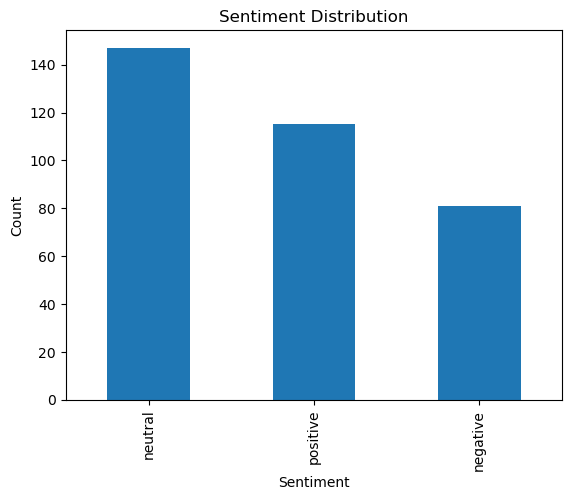

In [3]:
import matplotlib.pyplot as plt

# Sentiment distribution
df['overall_sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [4]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from collections import Counter

# Tokenize the text and remove stopwords
stop_words = set(stopwords.words('english'))
df['tokens'] = df['text'].apply(lambda x: [word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words])

# Flatten the list of tokens and count occurrences
all_tokens = [token for sublist in df['tokens'].tolist() for token in sublist]
token_counts = Counter(all_tokens)

# Display the most common terms
print(token_counts.most_common(20))

[('bed', 28), ('bedroom', 26), ('one', 23), ('people', 19), ('housing', 17), ('get', 14), ('living', 13), ('family', 11), ('even', 11), ('month', 10), ('new', 10), ('room', 10), ('canada', 9), ('condo', 9), ('rent', 9), ('think', 9), ('want', 9), ('home', 9), ('big', 9), ('affordable', 9)]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


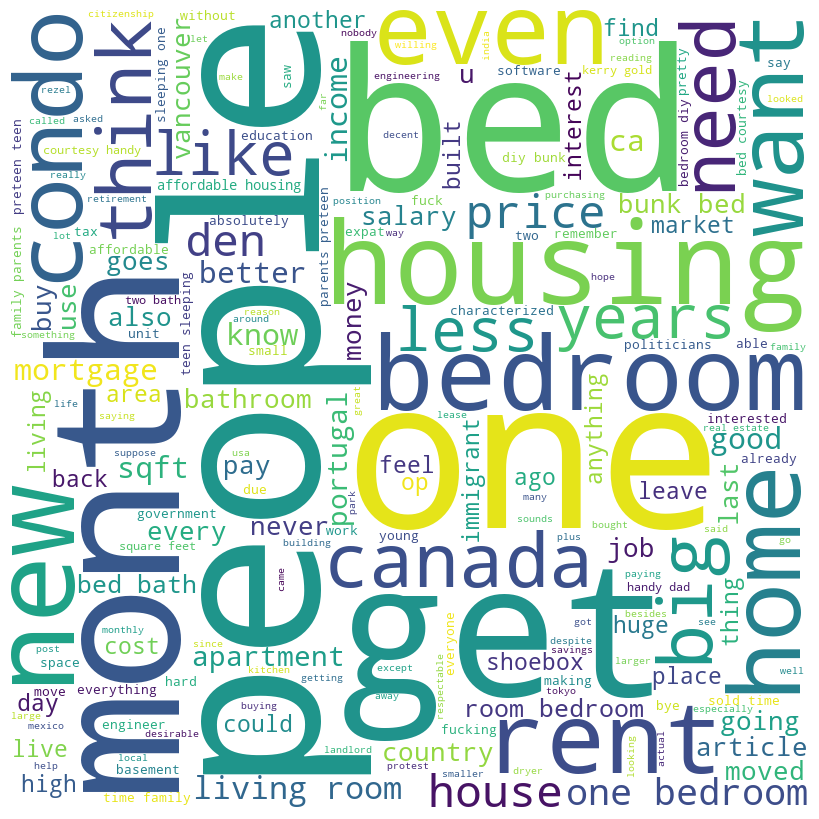

In [5]:
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stop_words, min_font_size = 10).generate(' '.join(all_tokens))

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [6]:
from nltk import ne_chunk, pos_tag
from nltk.tree import Tree

# Define a function to get named entities
def extract_named_entities(text):
    ne_tree = ne_chunk(pos_tag(word_tokenize(text)))
    named_entities = []

    for subtree in ne_tree:
        if type(subtree) == Tree:
            ne_label = subtree.label()
            ne_string = " ".join([token for token, pos in subtree.leaves()])
            named_entities.append((ne_string, ne_label))
    
    return named_entities

# Apply the function and inspect some results
df['named_entities'] = df['text'].apply(extract_named_entities)
df[['text', 'named_entities']].head()

,text,named_entities
0,We came to Canada exactly 3 years ago as perma...,"[(Canada, GPE)]"
1,a very tough express entry program. I got ever...,"[(IELTS, ORGANIZATION)]"
2,"score, a Software Engineering master's & bache...","[(Software, ORGANIZATION)]"
3,software engineering job experience under my b...,[]
4,cracked 4 interviews out of 5 interviews and s...,[]
